# Titanic Dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## A) Dataset

In [4]:
df = pd.read_csv('Titanic Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [48]:
df['Age'].fillna(int(df['Age'].mean()),inplace=True)
df['Cabin'].fillna('Not_Provided',inplace=True)
df['Embarked'].fillna('Not_Provided',inplace=True)
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [13]:
df.shape

(891, 12)

## Comments
The dataset consisits of 12 columns and 891 rows.

The Age and Cabin Entries had NaN objects but were replaced.

Numerical Columns:
PassengerId-Survived-Pclass-Age-SibSp-Parch-Fare

Non-Numerical Columns:
Name-Sex-Ticket-Cabin-Embarked

## -------------------------------------------------------------------------------------

## B) Data Visualization

[Text(0.5, 1.0, 'Outliers: Fare')]

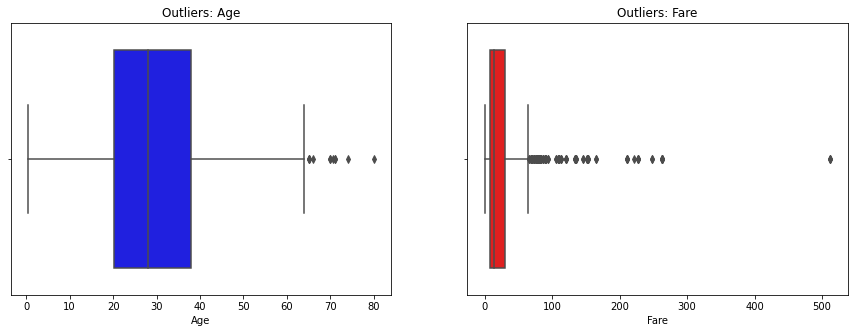

In [22]:
# detecting the outliers
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15,5)

sns.boxplot(x='Age', data=df, color='blue',ax=axes[0]).set(title='Outliers: Age')
sns.boxplot(x='Fare', data=df, color='red',ax=axes[1]).set(title='Outliers: Fare')

In [23]:
#Old Aged Passengers
df[df['Age']>70]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [24]:
#First Class Passengers
df[df['Fare']>400]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


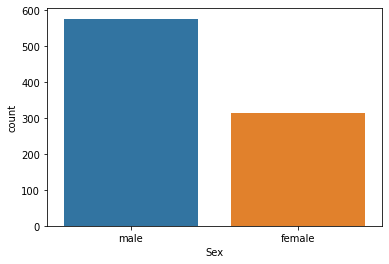

In [25]:
# Differentiating between customers according to gender
sns.countplot(x='Sex',data=df)

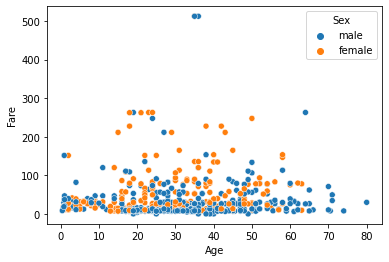

In [32]:
# Paid fare relation with age anf gender
sns.scatterplot(x='Age',y='Fare',hue='Sex',data=df)

In [33]:
# Correlation between dataset columns
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


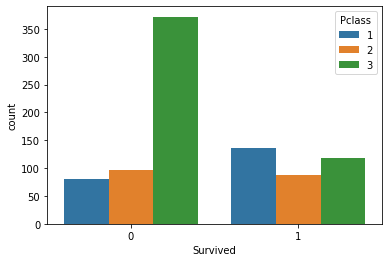

In [35]:
# Less Survive rate at Pclass 3
sns.countplot(data=df,x='Survived',hue='Pclass')

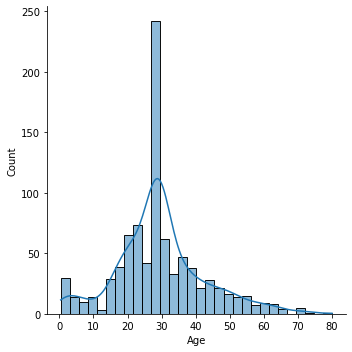

In [57]:
#Most Custoers are around 30
sns.displot(df.Age,kde=True)

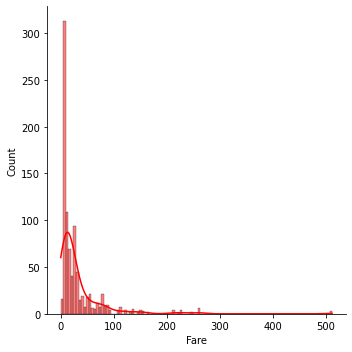

In [59]:
#The most paid fare is between 0 and 100
sns.displot(df.Fare,kde=True,color='red')

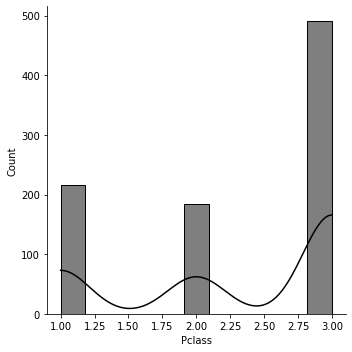

In [60]:
# Most Customers are Class 3
sns.displot(df.Pclass,kde=True,color='black')

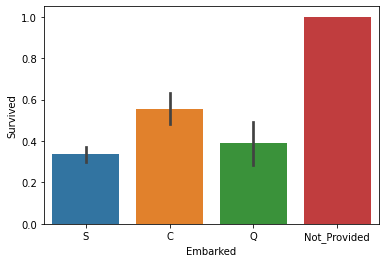

In [61]:
sns.barplot(data = df, y='Survived',x='Embarked')

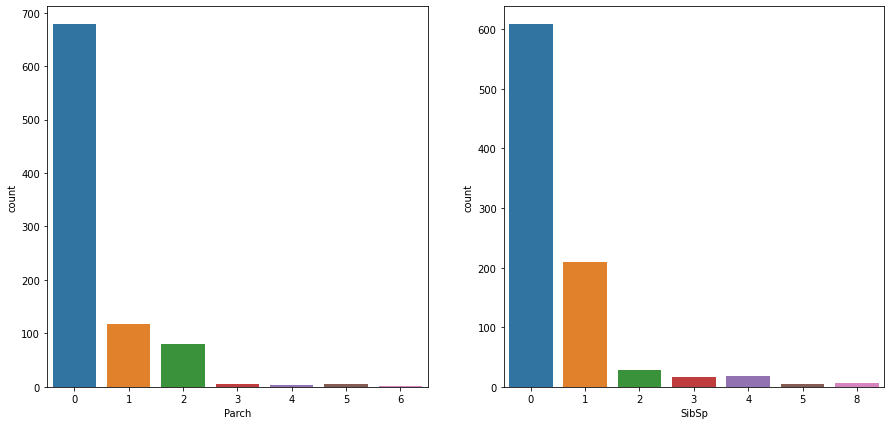

In [72]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15,7)

sns.countplot(data=df,x='Parch',ax=axes[0])
sns.countplot(data=df,x='SibSp',ax=axes[1])